# Part 4: Random networks


#### Erdős-Rényi Network - Exercise 3.1 (Homework 3.11 - Erdős-Rényi Network)


##### Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = 10–3.

1. What is the expected number of links, 〈L〉?
2. In which regime is the network?
3. Calculate the probability pc so that the network is at the critical point
4. Given the linking probability p = 10–3, calculate the number of nodes Ncr so that the network has only one component.
5. For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.
6. Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).

In [7]:
import numpy as np

### Consider an Erdős-Rényi network with N = 3,000 nodes, connected to each other with probability p = 10^–3.
N = 3000
p = 10**(-3)

In [8]:
## 1. What is the expected number of links, 〈L〉?
#〈L〉= p*N*(N-1)/2
L = (p*N*(N-1))/2
print("expected number of links", L)

expected number of links 4498.5


In [9]:
## 2. In which regime is the network?
# we need the average degree of the network:
# 〈k〉= p*(N-1)
k = p*(N-1)
print("average degree", k)
# natural log of N
lnN = np.log(N)
print("natural log of N", lnN)

    # It is a supercritical Regime as 1 < k < ln(N).

average degree 2.999
natural log of N 8.006367567650246


In [10]:
## 3. Calculate the probability pc so that the network is at the critical point
pc = 1/(N-1)
print("probability pc", pc*100, "%")


probability pc 0.03334444814938312 %


In [13]:

## 4. Given the linking probability p = 10^–3, calculate the number of nodes Ncr so that the network has only one component.
# The critical number of nodes for the network to have only one component is:
# 〈k〉= p*(N-1) > ln(N)
# hereby the threshold value for N is found when:
# p*(N-1) = ln(N)

# We start by trying different values of N until we find the one that satisfies the equation above.
# we know 3000 is too low, so we start there:
NC_trys = [3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 11000, 12000]
# find minimum N where p*(N-1) > ln(N)
for n in NC_trys:
    if p*(n-1) > np.log(n):
        print("N for which the network is connected: ", n)
        break

# We find the exact value of N using fsolve from scipy.optimize and our estimate as start guess:
from scipy.optimize import fsolve
N_cr = np.ceil(fsolve(lambda N: (N-1)*p - np.log(N), 10000))
print("N for which the network is connected: ", N_cr)



N for which the network is connected:  10000
N for which the network is connected:  [9120.]


In [14]:
## 5. For the network in (d), calculate the average degree 〈kcr〉 and the average distance between two randomly chosen nodes 〈d〉.

k_cr = p*(N_cr-1)
print("average degree at critical point", k_cr)

# FROM BOOK Box 3.11: The average distance between two randomly chosen nodes 〈d〉 in a connected Erdős-Rényi network can be approximated by:
# 〈d〉 ≈ ln(N) / ln(〈k〉)
d = np.log(N_cr) / np.log(k_cr)
print("average distance between two randomly chosen nodes", d)




average degree at critical point [9.119]
average distance between two randomly chosen nodes [4.12522144]


degree distribution pk for the average degree 0.2240771037727713


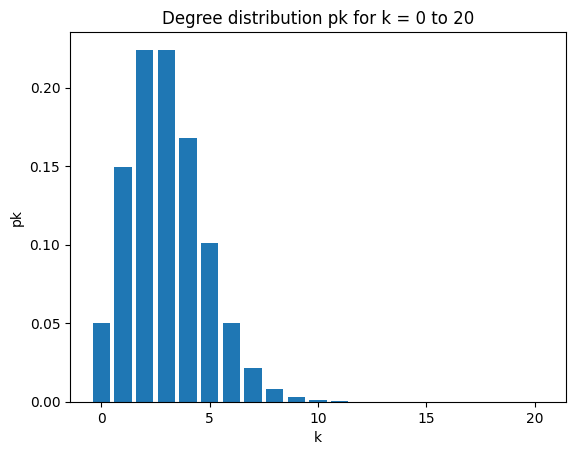

In [15]:
## 6. Calculate the degree distribution pk of this network (approximate with a Poisson degree distribution).
# pk = e^-k * k^k / k!
from scipy.special import factorial

pk_average = np.exp(-k)*(k**k/factorial(k))

print("degree distribution pk for the average degree", pk_average)

# plot pk for k = 0 to 20
import matplotlib.pyplot as plt
k_values = np.arange(0, 21)
pk_values = np.exp(-k)*(k**k_values/factorial(k_values))
plt.bar(k_values, pk_values)
plt.xlabel("k")
plt.ylabel("pk")
plt.title("Degree distribution pk for k = 0 to 20")
plt.show()


## Paths. 
#### Plot a random network with 200 nodes and an average degree of 1.5. (I suggest using networkx.draw and reading the documentation carefully to get an overview of all the options and what they look like. For example, you may want to shrink the node size).
- Extract the Giant Connected Component, GCC. (Hint: You can use networkx.connected_component_subgraphs <- it works in ealier versions of NetworkX (<2.5) || Otherwise, you can use nx.connected_components(G) and G.subgraph(c).copy())
- Choose a node at random from the GCC. (Hint: You may want to try random.choice.)
- Find all nodes that are precisely 2 steps away from that node. (Hint. I suggest networkx.single_source_shortest_path_length)
- Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). Again, I suggest using networkx.draw() and reading the documentation carefully find out how to color individual nodes.

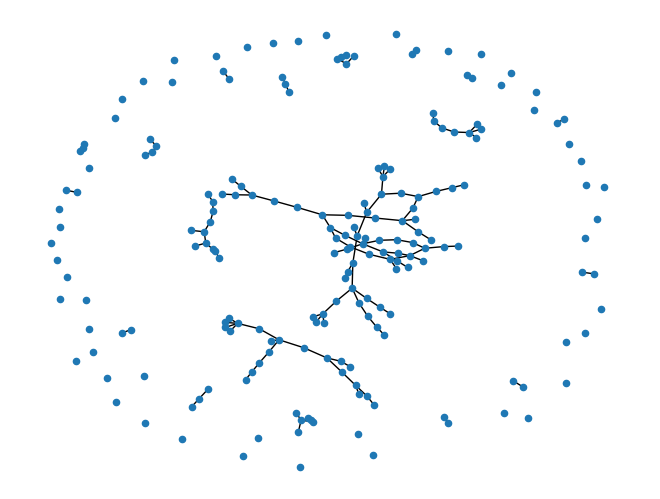

GCC:  Graph with 68 nodes and 70 edges


NodeView((130, 131, 5, 134, 7, 137, 138, 12, 141, 140, 15, 14, 145, 19, 23, 24, 25, 26, 155, 28, 159, 162, 35, 36, 166, 40, 168, 42, 169, 44, 172, 173, 47, 48, 176, 178, 174, 49, 53, 183, 58, 187, 60, 191, 193, 67, 196, 69, 198, 199, 73, 74, 84, 85, 86, 88, 93, 94, 97, 98, 109, 112, 116, 117, 118, 121, 124, 127))

In [16]:
import networkx as nx

N = 200
k = 1.5

p = k/(N-1)

# Random graph (with seed for reproducibility)
G = nx.erdos_renyi_graph(N, p, seed=1234)

# draw the graph
nx.draw(G, node_size=20) 
plt.show()

## 1. GCC

# Extract the Giant Connected Component
GCC = max(nx.connected_components(G), key=len)
GCC = G.subgraph(GCC).copy()
print("GCC: ", GCC)
GCC.nodes()


In [17]:

## 2. Find all nodes that are precisely 2 steps away from that node
import random
random.seed(1234)
start_node = random.choice(list(GCC.nodes()))
print("start node: ", start_node)
# find all nodes that are max. 2 steps away from that node
nodes_max_2_steps_away = nx.single_source_shortest_path_length(GCC, start_node, cutoff=2)

print("nodes max 2 steps away: ", nodes_max_2_steps_away)

# Extract "2 steps" away nodes
nodes_2_steps_away = [node for node, length in nodes_max_2_steps_away.items() if length == 2]

print("nodes 2 steps away: ", nodes_2_steps_away)


start node:  93
nodes max 2 steps away:  {93: 0, 25: 1, 130: 2, 15: 2, 73: 2, 116: 2}
nodes 2 steps away:  [130, 15, 73, 116]


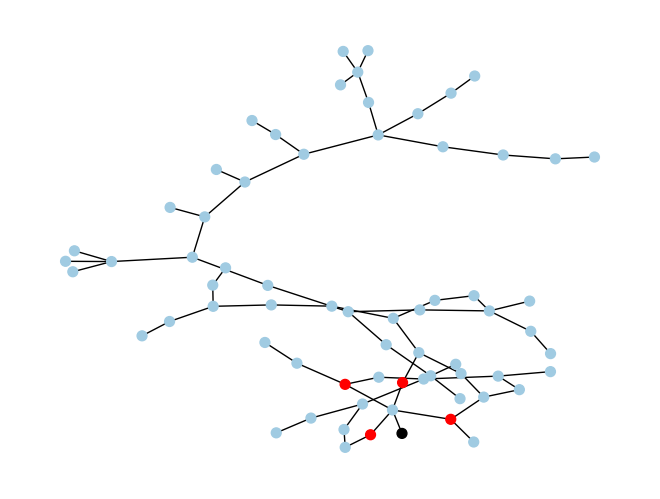

In [ ]:
## 3. Plot the GCC with the following choice of colors. Starting node black ("#000000"). The nodes 2 steps away red ("#ff0000"). All other nodes blue ("#A0CBE2"). 

# plot the GCC
color_map = []
for node in GCC:
    if node == start_node:
        color_map.append("#000000")  # black
    elif node in nodes_2_steps_away:
        color_map.append("#ff0000")  # red
    else:
        color_map.append("#A0CBE2")  # blue

nx.draw(GCC, node_color=color_map, node_size=0)
plt.show()

